In [ ]:
#Andrew Austin - INF2178H Midterm Project - diabetes data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
diabetes_raw = pd.read_csv('diabetes.csv')

diabetes_raw.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [29]:
#Check to see if there are any missing values
diabetes_raw.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Therefore no Missing values
#Check to see if there are any null values
diabetes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_raw.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
#Tidying the Data

#Replace the values of 0 for Glucose, BloodPressure, SkinThickness, Insulin and BMI with the median

In [15]:
def replace_with_median(diabetes_raw, value, value_at):
    column_median = diabetes_raw.loc[diabetes_raw[value] != 0, [value, value_at]].groupby(value_at).median()
    diabetes_raw.loc[(diabetes_raw[value] == 0)&(diabetes_raw[value_at] == 0), value] = column_median.iloc[0][0]
    diabetes_raw.loc[(diabetes_raw[value] == 0)&(diabetes_raw[value_at] == 1), value] = column_median.iloc[1][0]
    
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:   
    replace_with_median(diabetes_raw, col, 'Outcome')
diabetes_tidy = diabetes_raw
diabetes_raw.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.389323      29.089844  141.753906   
std       3.369578   30.464161      12.106039       8.890820   89.100847   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  140.250000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.471876   33.240885    0.348958  
std      6.880498                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [23]:
diabetes_tidy.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148           72.0             35    169.5  33.6   
1             1       85           66.0             29    102.5  26.6   
2             8      183           64.0             32    169.5  23.3   
3             1       89           66.0             23     94.0  28.1   
4             0      137           40.0             35    168.0  43.1   
5             5      116           74.0             27    102.5  25.6   
6             3       78           50.0             32     88.0  31.0   
7            10      115           70.0             27    102.5  35.3   
8             2      197           70.0             45    543.0  30.5   
9             8      125           96.0             32    169.5  34.3   
10            4      110           92.0             27    102.5  37.6   
11           10      168           74.0             32    169.5  38.0   
12           10      139           80.0             27    102.5  27.1   
13            1      189           60.0             23    846.0  30.1   
14            5      166           72.0             19    175.0  25.8   
15            7      100           74.5             32    169.5  30.0   
16            0      118           84.0             47    230.0  45.8   
17            7      107           74.0             32    169.5  29.6   
18            1      103           30.0             38     83.0  43.3   
19            1      115           70.0             30     96.0  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [38]:
#Convert the target columnn "Outcome" from a continuous to a categorical variable
diabetes_tidy['Outcome'] = diabetes_tidy['Outcome'].astype('category')
diabetes_tidy['Outcome'].value_counts(normalize=True)


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [39]:
diabetes_tidy.groupby(['Outcome']).mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.622000      70.844000      27.170000  117.172000   
1           4.865672  142.302239      75.272388      32.671642  187.615672   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.846000                  0.429734  31.190000  
1        35.398507                  0.550500  37.067164

In [24]:
#Exploratory Data Analysis

In [27]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(20,25))
sns.distplot(diabetes_tidy.Age, bins = 10, color = 'red', ax=ax[0,0]) 
sns.distplot(diabetes_tidy.Pregnancies, bins = 10, color = 'orange', ax=ax[0,1]) 
sns.distplot(diabetes_tidy.Glucose, bins = 10, color = 'blue', ax=ax[1,0]) 
sns.distplot(diabetes_tidy.BloodPressure, bins = 10, color = 'black', ax=ax[1,1]) 
sns.distplot(diabetes_tidy.SkinThickness, bins = 10, color = 'green', ax=ax[2,0])
sns.distplot(diabetes_tidy.Insulin, bins = 10, color = 'purple', ax=ax[2,1])
sns.distplot(diabetes_tidy.DiabetesPedigreeFunction, bins = 10, color = 'pink', ax=ax[3,0]) 
sns.distplot(diabetes_tidy.BMI, bins = 10, ax=ax[3,1]) 

In [55]:
#Heatmap to see correlation of variables
corr = diabetes_tidy.corr()
ax = plt.axes()
sns.heatmap(corr,
            xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, annot=True)
ax.set_title('Diabetes Heatmap')

Text(0.5, 1, 'Diabetes Heatmap')

In [ ]:
#This heatmap shows the correlation between Age/Pregancies, Insulin/Glucose and BMI/SkinThickness


Text(0.5, 1.0, 'BMI Binning Count')

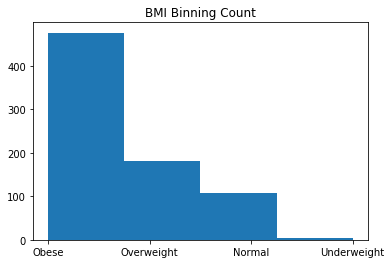

In [54]:
#Binning BMI
diabetes_tidy['bins'] = pd.cut(diabetes_tidy['BMI'], bins = [0,18.5,25,30,67.1], labels = ['Underweight', 'Normal', 'Overweight', 'Obese'], include_lowest=True)
plt.hist(diabetes_tidy['bins'],bins=4)
plt.title("BMI Binning Count")

In [56]:
#T-Test

In [61]:
pima_df_mod = diabetes_tidy.copy()
pima_df_mod['BloodPressure'] = pima_df_mod['BloodPressure'].mask(diabetes_tidy['BloodPressure'] == 0,diabetes_tidy['BloodPressure'].median())

In [63]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(pima_df_mod['BMI'] , diabetes_tidy['BMI'])
print("compare means", pima_df_mod['BMI'].mean() , diabetes_tidy['BMI'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

compare means 32.43463541666664 32.43463541666664
Tstatistic , Pvalue 0.0 1.0
Samples are likely drawn from the same distributions (fail to reject H0)


[Text(0.5, 1.0, 'BMI Distribution for Diabetic and Non-Diabetic Pima Indian Females')]

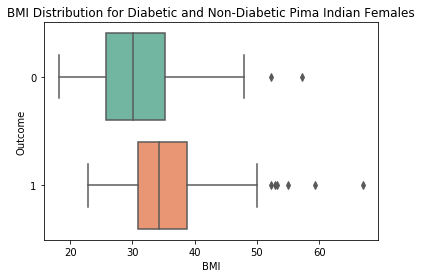

In [65]:
#Boxplot for BMI
#x - independant variable = BMI
#y - dependant variable = Outcome

sns.boxplot(x='BMI',y='Outcome', data = diabetes_tidy, palette='Set2').set(title='BMI Distribution for Diabetic and Non-Diabetic Pima Indian Females')

[Text(0.5, 1.0, 'Glucose Distribution for Diabetic and Non-Diabetic Pima Indian Females')]

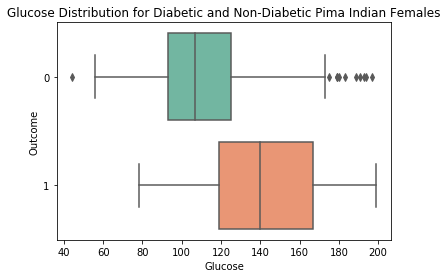

In [109]:
sns.boxplot(x='Glucose',y='Outcome', data = diabetes_tidy, palette='Set2').set(title='Glucose Distribution for Diabetic and Non-Diabetic Pima Indian Females')

In [66]:
#Multiple Linear Regression for BMI, Skin Thickness, Age, Glucose and Insulin
x = diabetes_tidy[['BMI', 'Age', 'Insulin', 'SkinThickness', 'Glucose' ]]
y = diabetes_tidy['Outcome']

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
coeff_df = pd.DataFrame(regressor.coef_,x.columns, columns=['Coefficient'])
coeff_df

Coefficient
BMI               0.010872
Age               0.004623
Insulin           0.000673
SkinThickness     0.003847
Glucose           0.005439

In [72]:
y_pred = regressor.predict(x_test)

In [76]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

Actual  Predicted
661      1   0.909406
122      0   0.215717
113      0   0.050837
14       1   0.589456
529      0   0.166756
..     ...        ...
476      1   0.352617
482      0  -0.008989
230      1   0.569011
527      0   0.135593
380      0   0.177784

[154 rows x 2 columns]

In [74]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.3023454365263966
MSE: 0.13613362869844425
RMSE: 0.36896290965142314


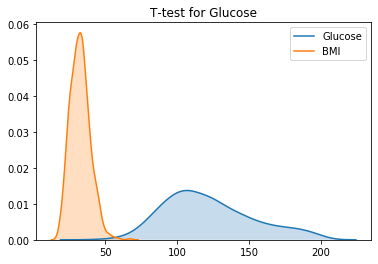

In [143]:
#T-Test
#df_outcome = pd.read_csv('diabetes.csv')


#d_bmi_zero = df_outcome['BMI'] & df_outcome['Outcome'] == 0

sns.kdeplot(diabetes_tidy['Glucose'], shade = True).set(title='T-test for Glucose')
sns.kdeplot(diabetes_tidy['BMI'], shade = True)

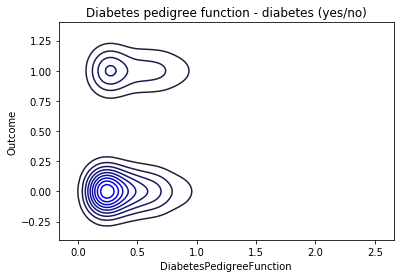

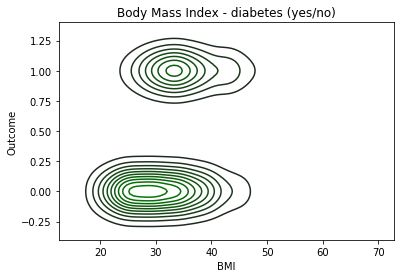

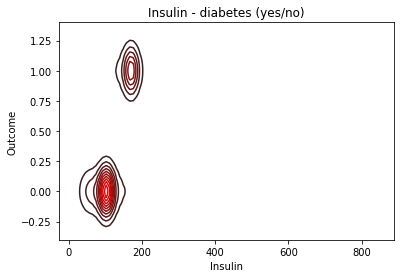

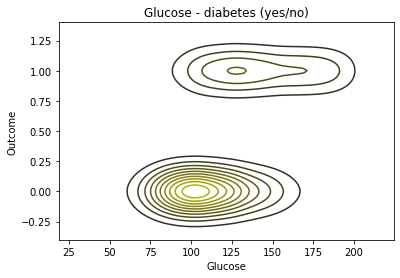

In [83]:
sns. kdeplot(diabetes_tidy['DiabetesPedigreeFunction'], diabetes_tidy['Outcome'], color="b")
plt.title('Diabetes pedigree function - diabetes (yes/no)')
plt.show()
sns. kdeplot(diabetes_tidy[ 'BMI'], diabetes_tidy['Outcome'], color="g")
plt.title('Body Mass Index - diabetes (yes/no)')
plt.show()
sns. kdeplot(diabetes_tidy['Insulin'], diabetes_tidy['Outcome'], color="r")
plt.title('Insulin - diabetes (yes/no)')
plt. show()
sns. kdeplot(diabetes_tidy['Glucose'], diabetes_tidy['Outcome'], color="y")
plt.title('Glucose - diabetes (yes/no)')
plt.show()

In [89]:
#ANOVA
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#model = ols('SkinThickness ~ C(BMI) + C(Insulin) + C(BMI):C(Insulin)', data=diabetes_tidy).fit()
#anova_table = sm.stats.anova_lm(model, typ=2)
#anova_table

In [91]:
#ANOVA
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

In [102]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [144]:
#Anova

In [159]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Glucose ~ BMI', data=diabetes_tidy).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df           F        PR(>F)
Outcome   175113.840010    1.0  249.923949  6.226933e-49
Residual  536712.076657  766.0         NaN           NaN


In [147]:
#post hoc tests: tukey hsd
#tukey hsd with bonferroni's correction
pair_t = mod.t_test_pairwise('Outcome')
pair_t.result_frame

coef   std err          t         P>|t|  Conf. Int. Low  \
1-0  31.680239  2.003939  15.808983  6.226933e-49       27.746375   

     Conf. Int. Upp.  pvalue-hs  reject-hs  
1-0        35.614103        0.0       True

In [175]:
#Anova
model = ols('BMI~Glucose', data=diabetes_tidy).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

             df        sum_sq      mean_sq          F        PR(>F)
Glucose     1.0   2025.297652  2025.297652  45.248886  3.395893e-11
Residual  766.0  34285.441046    44.759061        NaN           NaN


In [ ]:
#The results tell us that there is a significant difference between groups means (p = 3.95e-11)